<a href="https://colab.research.google.com/github/Santo1337/ADTA/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC

/usr/local/lib/python3.8/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Census.csv')

In [ ]:
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [ ]:
df.isnull().sum()

Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [ ]:
df['Approximated Social Grade'].value_counts()

 2    159642
-9    124103
 4    123739
 1     82320
 3     79936
Name: Approximated Social Grade, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569740 entries, 0 to 569739
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Person ID                  569740 non-null  int64  
 1   Region                     569740 non-null  object 
 2   Residence Type             569740 non-null  object 
 3   Family Composition         569740 non-null  int64  
 4   Population Base            569740 non-null  int64  
 5   Sex                        569740 non-null  int64  
 6   Age                        569740 non-null  int64  
 7   Marital Status             569740 non-null  int64  
 8   Student                    569740 non-null  int64  
 9   Country of Birth           569740 non-null  int64  
 10  Health                     569740 non-null  int64  
 11  Ethnic Group               569740 non-null  int64  
 12  Religion                   569740 non-null  int64  
 13  Economic Activity          56

In [ ]:
df.shape

(569740, 19)

# Data Preprocessing

In [ ]:
dff=df.dropna()

In [ ]:
dff.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
302321,7394645,E12000001,H,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2.0,4
302322,7394688,E12000001,H,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1.0,2
302323,7394756,E12000001,H,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10.0,4
302324,7394737,E12000001,H,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3.0,4
302325,7394536,E12000001,H,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8.0,4


In [ ]:
dff.where(dff== -9).count()

Person ID                       0
Region                          0
Residence Type                  0
Family Composition           2251
Population Base                 0
Sex                             0
Age                             0
Marital Status                  0
Student                         0
Country of Birth                0
Health                          0
Ethnic Group                    0
Religion                        0
Economic Activity               0
Occupation                      0
Industry                        0
Hours worked per week           0
No of hours                     0
Approximated Social Grade    2251
dtype: int64

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267419 entries, 302321 to 569739
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Person ID                  267419 non-null  int64  
 1   Region                     267419 non-null  object 
 2   Residence Type             267419 non-null  object 
 3   Family Composition         267419 non-null  int64  
 4   Population Base            267419 non-null  int64  
 5   Sex                        267419 non-null  int64  
 6   Age                        267419 non-null  int64  
 7   Marital Status             267419 non-null  int64  
 8   Student                    267419 non-null  int64  
 9   Country of Birth           267419 non-null  int64  
 10  Health                     267419 non-null  int64  
 11  Ethnic Group               267419 non-null  int64  
 12  Religion                   267419 non-null  int64  
 13  Economic Activity       

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dff['Region']= le.fit_transform(dff['Region'])
dff['Residence Type']= le.fit_transform(dff['Residence Type'])
dff.head()

<ipython-input-54-01f9daada702>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Region']= le.fit_transform(dff['Region'])
<ipython-input-54-01f9daada702>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Residence Type']= le.fit_transform(dff['Residence Type'])


,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
302321,7394645,0,1,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2.0,4
302322,7394688,0,1,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1.0,2
302323,7394756,0,1,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10.0,4
302324,7394737,0,1,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3.0,4
302325,7394536,0,1,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8.0,4


In [ ]:
dff['Approximated Social Grade'].value_counts()

 2    95171
 1    58890
 4    57997
 3    53110
-9     2251
Name: Approximated Social Grade, dtype: int64

In [ ]:
dff.isnull().values.any()

False

In [ ]:
dff.mean()

Person ID                    7.677728e+06
Region                       4.732962e+00
Residence Type               9.935457e-01
Family Composition           2.220123e+00
Population Base              1.004248e+00
Sex                          1.470438e+00
Age                          4.159544e+00
Marital Status               1.884290e+00
Student                      1.959752e+00
Country of Birth             1.156859e+00
Health                       1.623972e+00
Ethnic Group                 1.266817e+00
Religion                     2.452851e+00
Economic Activity            1.272684e+00
Occupation                   4.602485e+00
Industry                     6.742973e+00
Hours worked per week        2.745299e+00
No of hours                  3.523479e+01
Approximated Social Grade    2.319547e+00
dtype: float64

In [ ]:
dff.median()

Person ID                    7675248.0
Region                             5.0
Residence Type                     1.0
Family Composition                 2.0
Population Base                    1.0
Sex                                1.0
Age                                4.0
Marital Status                     2.0
Student                            2.0
Country of Birth                   1.0
Health                             2.0
Ethnic Group                       1.0
Religion                           2.0
Economic Activity                  1.0
Occupation                         4.0
Industry                           7.0
Hours worked per week              3.0
No of hours                       37.0
Approximated Social Grade          2.0
dtype: float64

In [ ]:
#Checking skewness
dff.skew()

Person ID                     0.028261
Region                       -0.215887
Residence Type              -12.326552
Family Composition           -2.848333
Population Base              21.629042
Sex                           0.118457
Age                           0.161074
Marital Status                1.314563
Student                      -4.678496
Country of Birth              1.887126
Health                        1.061679
Ethnic Group                  2.904741
Religion                      2.308675
Economic Activity             2.943546
Occupation                    0.298888
Industry                      0.027345
Hours worked per week        -0.614205
No of hours                  -0.528415
Approximated Social Grade    -3.558847
dtype: float64

In [ ]:
#Checking kurtosis
dff.kurtosis()

Person ID                     -1.195954
Region                        -1.122673
Residence Type               149.945012
Family Composition            24.525678
Population Base              465.818959
Sex                           -1.985983
Age                           -0.700429
Marital Status                 1.452455
Student                       19.888469
Country of Birth               1.561256
Health                         1.232724
Ethnic Group                   7.584502
Religion                       4.176030
Economic Activity              8.754919
Occupation                    -1.144673
Industry                      -1.321146
Hours worked per week          0.057881
No of hours                   -0.211339
Approximated Social Grade     25.986435
dtype: float64

In [ ]:
#Converting  No of hours  to int
dff['No of hours']= dff['No of hours'].astype('int64')

C:\Users\UP2131~1\AppData\Local\Temp/ipykernel_3032/2633177056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['No of hours']= dff['No of hours'].astype('int64')


In [ ]:
def detect_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((x > upper_bound) | (x < lower_bound))

# Visulizetion

# Classification

In [ ]:
LIMIT = 500000
dff = dff[:LIMIT]

In [ ]:
dff.where(dff== -9).count()

Person ID                       0
Region                          0
Residence Type                  0
Family Composition           2251
Population Base                 0
Sex                             0
Age                             0
Marital Status                  0
Student                         0
Country of Birth                0
Health                          0
Ethnic Group                    0
Religion                        0
Economic Activity               0
Occupation                      0
Industry                        0
Hours worked per week           0
No of hours                     0
Approximated Social Grade    2251
dtype: int64

In [ ]:
X = dff.drop(['Approximated Social Grade'], axis = 1)
y = dff['Approximated Social Grade']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
#RandomForest
randomForest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
randomForestPred=randomForest.predict(X_test)
randomForestAcu=accuracy_score(randomForestPred,y_test)

#hgc
hgc = HistGradientBoostingClassifier()
hgc.fit(X_train, y_train)
hgc_pred = hgc.predict(X_test)
hgc_Acu = accuracy_score(y_test, hgc_pred)


#etc
etc = ExtraTreesClassifier(n_estimators=100, random_state=10)
etc.fit(X_train, y_train)
etc_pred = etc.predict(X_test)
etc_Acu = accuracy_score(y_test, etc_pred)


print('RandomForest Accuracy:\t\t',randomForestAcu)
print('hgc Accuracy:\t\t\t',hgc_Acu)
print('etc Accuracy:\t\t\t',etc_Acu)

RandomForest Accuracy:		 0.9066666666666666
hgc Accuracy:			 0.9
etc Accuracy:			 0.8666666666666667


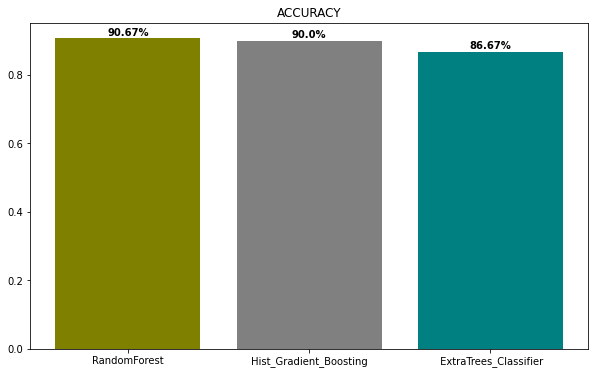

In [ ]:
data = pd.DataFrame({'A':['RandomForest','Hist_Gradient_Boosting',' ExtraTrees_Classifier'],
                     'B':[randomForestAcu,hgc_Acu,etc_Acu]
                    })

percentage = []
for i in range(data.shape[0]):
    pct = (data.B[i]) * 100
    percentage.append(round(pct,2))
data['Percentage'] = percentage

plt.figure(figsize=(10,6))
plt.title("ACCURACY")
colors_list = ['Olive','Gray', 'Teal', 'Purple','maroon']
graph = plt.bar(data.A,data.B, color = colors_list)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#Random Forest
RF= RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
#HistGradientBoosting
hgc = HistGradientBoostingClassifier()
hgc.fit(X_train, y_train)
hgc_pred = hgc.predict(X_test)
#Extra tree
etc = ExtraTreesClassifier(n_estimators=100, random_state=10)
etc.fit(X_train, y_train)
etc_pred = etc.predict(X_test)

print(classification_report(y_test,y_pred, zero_division=1))
print(classification_report(y_test,hgc_pred, zero_division=1))
print(classification_report(y_test,etc_pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.89      0.62      0.73        13
           2       0.93      0.99      0.96        67
           3       0.72      0.81      0.76        16
           4       0.94      0.91      0.92        54

    accuracy                           0.91       150
   macro avg       0.87      0.83      0.84       150
weighted avg       0.91      0.91      0.90       150

              precision    recall  f1-score   support

           1       0.75      0.69      0.72        13
           2       0.94      0.96      0.95        67
           3       0.70      0.88      0.78        16
           4       0.96      0.89      0.92        54

    accuracy                           0.90       150
   macro avg       0.84      0.85      0.84       150
weighted avg       0.91      0.90      0.90       150

              precision    recall  f1-score   support

           1       0.78      0.54      0.64        13
           2       0.

In [ ]:
#RF Model performance Report
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 8  5  0  0]
 [ 1 66  0  0]
 [ 0  0 13  3]
 [ 0  0  5 49]]
Accuracy Score: 0.9066666666666666


In [ ]:
#HGC Model performance Report
print('Confusion Matrix:\n',confusion_matrix(y_test, hgc_pred))
print('Accuracy Score:',accuracy_score(y_test,hgc_pred))

Confusion Matrix:
 [[ 9  4  0  0]
 [ 3 64  0  0]
 [ 0  0 14  2]
 [ 0  0  6 48]]
Accuracy Score: 0.9


In [ ]:
#ETC Model performance Report
print('Confusion Matrix:\n',confusion_matrix(y_test, etc_pred))
print('Accuracy Score:',accuracy_score(y_test,etc_pred))

Confusion Matrix:
 [[ 7  6  0  0]
 [ 2 65  0  0]
 [ 0  1 10  5]
 [ 0  1  5 48]]
Accuracy Score: 0.8666666666666667


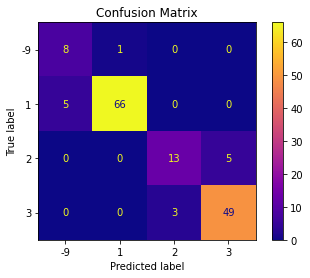

In [ ]:
#Random Forest Confusion Matrix
Conf_mat = confusion_matrix(RF.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["-9","1","2","3","4"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix")
plt.show()

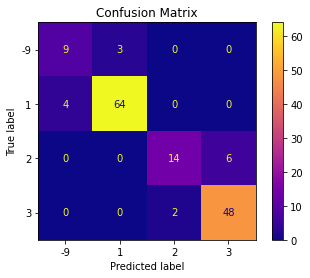

In [ ]:
#hgc Confusion Matrix
Conf_mat = confusion_matrix(hgc.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["-9","1","2","3","4"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix")
plt.show()

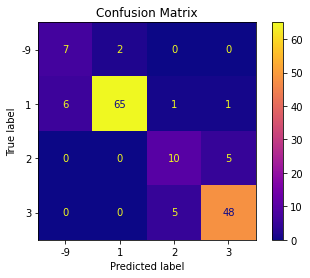

In [ ]:
#extra tree Confusion Matrix
Conf_mat = confusion_matrix(etc.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["-9","1","2","3","4"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle

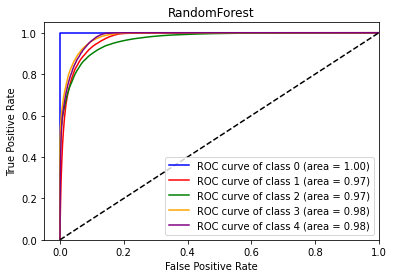

In [ ]:
#RandomForest

classifier = RandomForestClassifier(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[-9, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','Orange','Purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest')
plt.legend(loc="lower right")
plt.show()

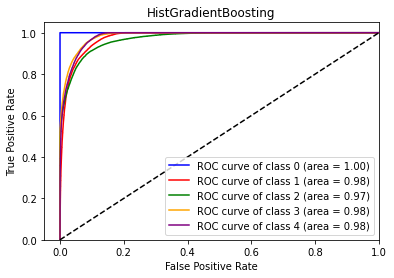

In [ ]:
#HistGradientBoosting

classifier = HistGradientBoostingClassifier(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[-9, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','Orange','Purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('HistGradientBoosting')
plt.legend(loc="lower right")
plt.show()

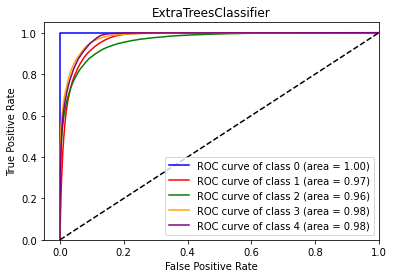

In [ ]:
#ExtraTreesClassifier

classifier = ExtraTreesClassifier(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[-9, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','Orange','Purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ExtraTreesClassifier')
plt.legend(loc="lower right")
plt.show()

# Regression

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
dff.columns

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

In [ ]:
dfb=dff

In [ ]:
#Changing the Names of yhe columns
dict = {'Person ID':'Person_ID'

    ,'Residence Type':'Residence_Type','Family Composition':'Family_Composition','Population Base':'Population_Base',
      'Marital Status': 'Marital_Status','Country of Birth':'Country_of_Birth','Ethnic Group':'Ethnic_Group','Economic Activity':'Economic_Activity',
      	'Hours worked per week':	'Hours_worked_per_week','No of hours':'Hours_Number','Approximated Social Grade': 'Approximated_Social_Grade'

       }

dfb.rename(columns = dict, inplace = True)
dfb.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
302321,7394645,0,1,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2,4
302322,7394688,0,1,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1,2
302323,7394756,0,1,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10,4
302324,7394737,0,1,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3,4
302325,7394536,0,1,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8,4


In [ ]:
dfb1=dfb

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaledstd = pd.DataFrame(ss.fit_transform(dfb1),columns = dfb1.columns)
df_scaledstd

,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
0,-1.726358,-1.830319,0.080599,1.847508,-0.046136,1.060981,0.614402,2.246636,0.204782,-0.431325,1.921933,-0.344693,-0.214921,1.096701,0.930939,0.079949,-2.167025,-2.458039,1.132258
1,-1.726095,-1.830319,0.080599,-0.146294,-0.046136,1.060981,-1.578699,-0.939013,-4.883251,-0.431325,-0.871518,-0.344693,3.107249,4.112453,0.930939,-0.853213,-2.167025,-2.531999,-0.215305
2,-1.725681,-1.830319,0.080599,-0.146294,-0.046136,1.060981,0.614402,0.122870,0.204782,-0.431325,1.921933,-0.344693,-0.689517,-0.411174,1.707526,0.702058,-2.167025,-1.866360,1.132258
3,-1.725797,-1.830319,0.080599,-0.146294,-0.046136,1.060981,1.345436,0.122870,0.204782,-0.431325,-0.871518,-0.344693,-0.214921,-0.411174,1.707526,1.324166,-2.167025,-2.384079,1.132258
4,-1.727022,-1.830319,0.080599,1.847508,-0.046136,1.060981,1.345436,1.184753,0.204782,-0.431325,0.525208,-0.344693,-0.689517,-0.411174,1.707526,1.013112,-2.167025,-2.014280,1.132258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267414,0.013974,0.876703,-12.407082,-7.456901,-0.046136,-0.942524,-1.578699,-0.939013,0.204782,2.318440,-0.871518,-0.344693,-0.214921,-0.411174,-0.622234,0.702058,1.557882,1.239952,-7.626901
267415,-0.015512,0.876703,-12.407082,-7.456901,-0.046136,-0.942524,-0.847666,-0.939013,0.204782,2.318440,0.525208,0.947177,-0.689517,-0.411174,-1.398821,-0.542159,1.557882,1.461831,-7.626901
267416,-0.015561,0.876703,-12.407082,-7.456901,-0.046136,1.060981,0.614402,0.122870,0.204782,-0.431325,-0.871518,-0.344693,-0.214921,1.096701,-1.398821,0.391004,1.557882,1.018073,-7.626901
267417,1.627586,1.650138,0.080599,-0.146294,-0.046136,-0.942524,1.345436,0.122870,0.204782,-0.431325,1.921933,-0.344693,-0.689517,-0.411174,0.542646,1.013112,1.557882,1.313912,0.458476


In [ ]:
statMDL=smf.ols('Hours_Number~Person_ID+Region+Residence_Type+Family_Composition+Population_Base+Sex+Age+Marital_Status+Student+Country_of_Birth+Health+Ethnic_Group+Religion+Economic_Activity+Occupation+Industry+Hours_worked_per_week+Approximated_Social_Grade', data= dfb).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:           Hours_Number   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 1.055e+05
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:39:08   Log-Likelihood:            -7.9616e+05
No. Observations:              267419   AIC:                         1.592e+06
Df Residuals:                  267400   BIC:                         1.593e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
x = df_scaledstd[['Age','Country_of_Birth','Health','Hours_worked_per_week']]
y = df_scaledstd['Hours_Number']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df

Intercept: 8.390705085690943e-05


,Coefficient
Age,-0.001788
Country_of_Birth,0.000823
Health,0.000295
Hours_worked_per_week,0.935974


In [ ]:
predictions = linreg.predict(x_test)
pdf = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pdf

,Actual,Predicted
201805,-0.165285,0.296986
178144,-0.313204,0.295679
25781,-1.200722,-0.867767
211987,-0.091325,0.299249
265892,1.313912,1.459125
...,...,...
31358,-1.126762,-0.865153
149121,0.352434,0.299660
211103,-0.165285,0.294372
39538,-0.978843,-0.866048


In [ ]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [-1.78763259e-03  8.22874420e-04  2.94725207e-04  9.35973978e-01]
Intercept: 8.390705085690943e-05
MAE: 0.3013533618903476
MSE: 0.12331434133794521
RMSE: 0.35116141778097604
AccuracyII: 87.66243424099852 %
R2: 0.8766243424099852


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("Train set Accuracy: ", r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy: ", r2_score(y_test, predictions))

Train set Accuracy:  0.8764937801457104
Test set Accuracy:  0.8766243424099852


<AxesSubplot:xlabel='Hours_Number'>

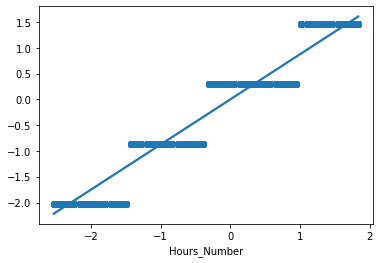

In [ ]:
sns.regplot(x=y_test, y=predictions)

In [ ]:
new_observation = [[5,2, 1,1]]
linreg.predict(new_observation)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.9290602])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_ = poly.fit_transform(x)
x_test_ = poly.fit_transform(x_test)

polymodel = LinearRegression()
polymodel.fit(x_, y)
polymodel.coef_

array([ 0.00000000e+00, -1.24678626e-03, -4.70767083e+06,  4.22560046e-04,
        9.32427232e-01,  5.08895501e-04, -3.46660065e-04,  1.30522383e-03,
        1.73360346e-03,  2.49463848e+06, -9.30675870e-04, -1.10849760e-03,
       -1.63078524e-04, -9.44599840e-04, -6.44270110e-03])

In [ ]:
predictions1 = polymodel.predict(x_test_)

In [ ]:
print('Coefficients:', polymodel.coef_)
print('Intercept:', polymodel.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
print('R2:', r2_score(y_test, predictions1))
accuracy = polymodel.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [ 0.00000000e+00 -1.24678626e-03 -4.70767083e+06  4.22560046e-04
  9.32427232e-01  5.08895501e-04 -3.46660065e-04  1.30522383e-03
  1.73360346e-03  2.49463848e+06 -9.30675870e-04 -1.10849760e-03
 -1.63078524e-04 -9.44599840e-04 -6.44270110e-03]
Intercept: -2494638.4771517767
MAE: 0.3014479229627976
MSE: 0.12323538232130872
RMSE: 0.35104897424904796
R2: 0.8767033406878375
AccuracyII: 87.67033406878375 %


<AxesSubplot:xlabel='Hours_Number'>

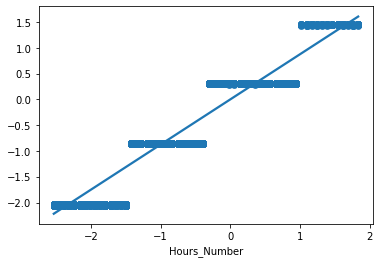

In [ ]:
sns.regplot(x=y_test, y=predictions1)

In [ ]:
dfb3=dfb

In [ ]:
dfb3.head()

,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
302321,7394645,0,1,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2,4
302322,7394688,0,1,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1,2
302323,7394756,0,1,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10,4
302324,7394737,0,1,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3,4
302325,7394536,0,1,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8,4


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaledstd1 = pd.DataFrame(ss.fit_transform(dfb3),columns = dfb3.columns)
df_scaledstd1

,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
0,-1.726358,-1.830319,0.080599,1.847508,-0.046136,1.060981,0.614402,2.246636,0.204782,-0.431325,1.921933,-0.344693,-0.214921,1.096701,0.930939,0.079949,-2.167025,-2.458039,1.132258
1,-1.726095,-1.830319,0.080599,-0.146294,-0.046136,1.060981,-1.578699,-0.939013,-4.883251,-0.431325,-0.871518,-0.344693,3.107249,4.112453,0.930939,-0.853213,-2.167025,-2.531999,-0.215305
2,-1.725681,-1.830319,0.080599,-0.146294,-0.046136,1.060981,0.614402,0.122870,0.204782,-0.431325,1.921933,-0.344693,-0.689517,-0.411174,1.707526,0.702058,-2.167025,-1.866360,1.132258
3,-1.725797,-1.830319,0.080599,-0.146294,-0.046136,1.060981,1.345436,0.122870,0.204782,-0.431325,-0.871518,-0.344693,-0.214921,-0.411174,1.707526,1.324166,-2.167025,-2.384079,1.132258
4,-1.727022,-1.830319,0.080599,1.847508,-0.046136,1.060981,1.345436,1.184753,0.204782,-0.431325,0.525208,-0.344693,-0.689517,-0.411174,1.707526,1.013112,-2.167025,-2.014280,1.132258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267414,0.013974,0.876703,-12.407082,-7.456901,-0.046136,-0.942524,-1.578699,-0.939013,0.204782,2.318440,-0.871518,-0.344693,-0.214921,-0.411174,-0.622234,0.702058,1.557882,1.239952,-7.626901
267415,-0.015512,0.876703,-12.407082,-7.456901,-0.046136,-0.942524,-0.847666,-0.939013,0.204782,2.318440,0.525208,0.947177,-0.689517,-0.411174,-1.398821,-0.542159,1.557882,1.461831,-7.626901
267416,-0.015561,0.876703,-12.407082,-7.456901,-0.046136,1.060981,0.614402,0.122870,0.204782,-0.431325,-0.871518,-0.344693,-0.214921,1.096701,-1.398821,0.391004,1.557882,1.018073,-7.626901
267417,1.627586,1.650138,0.080599,-0.146294,-0.046136,-0.942524,1.345436,0.122870,0.204782,-0.431325,1.921933,-0.344693,-0.689517,-0.411174,0.542646,1.013112,1.557882,1.313912,0.458476


In [ ]:
X = df_scaledstd1[['Age','Country_of_Birth','Health','Hours_worked_per_week']]
Y = df_scaledstd1['Hours_Number']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=5)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=4, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=4))])

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = Y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
#mae

print('Accuracy: ', cv_ridge.mean()*100,'%')
print('R2_score: ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ridge_test))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_ridge_test))

Accuracy:  87.65343639897829 %
R2_score:  0.8766894585787277
RMSE:  0.35106873619160883
MAE: 0.3014529509258474
MSE: 0.12324925753117343


<AxesSubplot:xlabel='Hours_Number'>

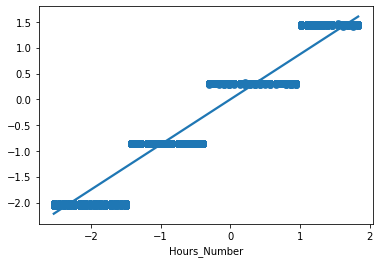

In [ ]:
sns.regplot(x=y_test, y=y_pred_ridge_test)

In [ ]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = Y_train, cv =2)

In [ ]:
# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)
# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)
# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('Accuracy: ', cv_dt.mean()*100,'%')
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_dt_test))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_dt_test))

Accuracy:  87.6866734142327 %
R2_score (train):  0.8773268918474589
R2_score (test):  0.8771657100543337
RMSE:  0.3503901293514909
MAE: 0.3008984174257852
MSE: 0.1227732427469545


# Association Rule Mining

In [ ]:
dfff=df.dropna()

In [ ]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267419 entries, 302321 to 569739
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Person ID                  267419 non-null  int64  
 1   Region                     267419 non-null  object 
 2   Residence Type             267419 non-null  object 
 3   Family Composition         267419 non-null  int64  
 4   Population Base            267419 non-null  int64  
 5   Sex                        267419 non-null  int64  
 6   Age                        267419 non-null  int64  
 7   Marital Status             267419 non-null  int64  
 8   Student                    267419 non-null  int64  
 9   Country of Birth           267419 non-null  int64  
 10  Health                     267419 non-null  int64  
 11  Ethnic Group               267419 non-null  int64  
 12  Religion                   267419 non-null  int64  
 13  Economic Activity       

In [ ]:
dfff["Family Composition"].replace([1],['Not in a family'], inplace=True)
dfff["Family Composition"].replace([2],['Married/same-sex civil partnership couple family'], inplace=True)
dfff["Family Composition"].replace([3],['Cohabiting couple family'], inplace=True)
dfff["Family Composition"].replace([4],['Lone parent family (male head)'], inplace=True)
dfff["Family Composition"].replace([5],['Lone parent family (female head)'], inplace=True)
dfff["Family Composition"].replace([6],['Other related family'], inplace=True)
dfff["Family Composition"].replace([-9],['No code required (Resident of a communal establishment, students or schoolchildren living away during term-time, or a short-term resident)'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
dfff["Population Base"].replace([1],['Usual resident'], inplace=True)
dfff["Population Base"].replace([2],['Student living away from home during term-time'], inplace=True)
dfff["Population Base"].replace([3],['Short-term resident'], inplace=True)

In [ ]:
dfff["Sex"].replace([1],[' Male'], inplace=True)
dfff["Sex"].replace([2],[' Female'], inplace=True)

In [ ]:
dfff["Age"].replace([1],['0 to 15'], inplace=True)
dfff["Age"].replace([2],['16 to 24'], inplace=True)
dfff["Age"].replace([3],['25 to 34'], inplace=True)
dfff["Age"].replace([4],['35 to 44'], inplace=True)
dfff["Age"].replace([5],['45 to 54'], inplace=True)
dfff["Age"].replace([6],['55 to 64'], inplace=True)
dfff["Age"].replace([7],['65 to 74'], inplace=True)
dfff["Age"].replace([8],['75 and over '], inplace=True)

In [ ]:
dfff["Marital Status"].replace([1],['Single (never married or never registered a same-sex civil partnership)'], inplace=True)
dfff["Marital Status"].replace([2],['Married or in a registered same-sex civil partnership'], inplace=True)
dfff["Marital Status"].replace([3],['Separated but still legally married or separated but still legally in a same-sex civil partnership'], inplace=True)
dfff["Marital Status"].replace([4],['Divorced or formerly in a same-sex civil partnership which is now legally dissolved'], inplace=True)
dfff["Marital Status"].replace([5],['Widowed or surviving partner from a same-sex civil partnership'], inplace=True)

In [ ]:
dfff["Student"].replace([1],[' Yes'], inplace=True)
dfff["Student"].replace([2],['No'], inplace=True)

In [ ]:
dfff["Country of Birth"].replace([1],['UK'], inplace=True)
dfff["Country of Birth"].replace([2],['Non UK'], inplace=True)

In [ ]:
dfff["Health"].replace([1],['Very good health'], inplace=True)
dfff["Health"].replace([2],['Good health'], inplace=True)
dfff["Health"].replace([3],['Fair health'], inplace=True)
dfff["Health"].replace([4],['Bad health'], inplace=True)
dfff["Health"].replace([5],['Very bad health'], inplace=True)

In [ ]:
dfff["Ethnic Group"].replace([1],['White'], inplace=True)
dfff["Ethnic Group"].replace([2],['Mixed'], inplace=True)
dfff["Ethnic Group"].replace([3],['Asian and Asian British'], inplace=True)
dfff["Ethnic Group"].replace([4],['Black or Black British'], inplace=True)
dfff["Ethnic Group"].replace([5],['Chinese or Other ethnic group'], inplace=True)

In [ ]:
dfff["Religion"].replace([1],['No religion'], inplace=True)
dfff["Religion"].replace([2],['Christian'], inplace=True)
dfff["Religion"].replace([3],['Buddhist'], inplace=True)
dfff["Religion"].replace([4],['Hindu'], inplace=True)
dfff["Religion"].replace([5],['Jewish'], inplace=True)
dfff["Religion"].replace([6],['Muslim'], inplace=True)
dfff["Religion"].replace([7],['Sikh'], inplace=True)
dfff["Religion"].replace([8],['Other religion'], inplace=True)
dfff["Religion"].replace([9],['Not stated'], inplace=True)

In [ ]:
dfff["Economic Activity"].replace([1],['Economically active: Employee'], inplace=True)
dfff["Economic Activity"].replace([2],['Economically active: Self-employed'], inplace=True)
dfff["Economic Activity"].replace([3],['Economically active: Unemployed'], inplace=True)
dfff["Economic Activity"].replace([4],['Economically active: Full-time student'], inplace=True)
dfff["Economic Activity"].replace([5],['Economically inactive: Retired'], inplace=True)
dfff["Economic Activity"].replace([6],['Economically inactive: Student'], inplace=True)
dfff["Economic Activity"].replace([7],['Economically inactive: Looking after home or family'], inplace=True)
dfff["Economic Activity"].replace([8],['Economically inactive: Long-term sick or disabled'], inplace=True)
dfff["Economic Activity"].replace([9],['Economically inactive: Other'], inplace=True)

In [ ]:
dfff["Occupation"].replace([1],['Managers, Directors and Senior Officials'], inplace=True)
dfff["Occupation"].replace([2],['Professional Occupations'], inplace=True)
dfff["Occupation"].replace([3],['Associate Professional and Technical Occupations'], inplace=True)
dfff["Occupation"].replace([4],['Administrative and Secretarial Occupations'], inplace=True)
dfff["Occupation"].replace([5],['Skilled Trades Occupations'], inplace=True)
dfff["Occupation"].replace([6],['Caring, Leisure and Other Service Occupations'], inplace=True)
dfff["Occupation"].replace([7],['Sales and Customer Service Occupations'], inplace=True)
dfff["Occupation"].replace([8],['Process, Plant and Machine Operatives'], inplace=True)
dfff["Occupation"].replace([9],['Elementary Occupations'], inplace=True)

In [ ]:
dfff["Industry"].replace([1],['Agriculture, forestry and fishing'], inplace=True)
dfff["Industry"].replace([2],['Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply'], inplace=True)
dfff["Industry"].replace([3],['Construction'], inplace=True)
dfff["Industry"].replace([4],['Wholesale and retail trade; Repair of motor vehicles and motorcycles'], inplace=True)
dfff["Industry"].replace([5],['Accommodation and food service activities'], inplace=True)
dfff["Industry"].replace([6],['Transport and storage; Information and communication'], inplace=True)
dfff["Industry"].replace([7],['Financial and insurance activities;Intermediation'], inplace=True)
dfff["Industry"].replace([8],['Real estate activities; Professional, scientific and technical activities; Administrative and support service activities'], inplace=True)
dfff["Industry"].replace([9],['Public administration and defence; compulsory social security'], inplace=True)
dfff["Industry"].replace([10],['Education'], inplace=True)
dfff["Industry"].replace([11],['Human health and social work activities'], inplace=True)
dfff["Industry"].replace([12],['Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies'], inplace=True)

In [ ]:
dfff["Hours worked per week"].replace([1],['Part-time: 15 or less hours worked'], inplace=True)
dfff["Hours worked per week"].replace([2],['Part-time: 16 to 30 hours worked '], inplace=True)
dfff["Hours worked per week"].replace([3],['Full-time: 31 to 48 hours worked'], inplace=True)
dfff["Hours worked per week"].replace([4],['Full-time: 49 or more hours worked'], inplace=True)

In [ ]:
dfff["Approximated Social Grade"].replace([1],['AB'], inplace=True)
dfff["Approximated Social Grade"].replace([2],['C1'], inplace=True)
dfff["Approximated Social Grade"].replace([3],['C2'], inplace=True)
dfff["Approximated Social Grade"].replace([4],['DE'], inplace=True)
dfff["Approximated Social Grade"].replace([-9],[' No code required (People aged under 16, people resident in communal establishments, and students or schoolchildren living away during termtime)'], inplace=True)

In [ ]:
dfff.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
302321,7394645,E12000001,H,Lone parent family (female head),Usual resident,Female,45 to 54,Divorced or formerly in a same-sex civil partn...,No,UK,Fair health,White,Christian,Economically active: Self-employed,Sales and Customer Service Occupations,Financial and insurance activities;Intermediation,Part-time: 15 or less hours worked,2.0,DE
302322,7394688,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Female,16 to 24,Single (never married or never registered a sa...,Yes,UK,Very good health,White,Not stated,Economically active: Full-time student,Sales and Customer Service Occupations,Wholesale and retail trade; Repair of motor ve...,Part-time: 15 or less hours worked,1.0,C1
302323,7394756,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Female,45 to 54,Married or in a registered same-sex civil part...,No,UK,Fair health,White,No religion,Economically active: Employee,Elementary Occupations,Public administration and defence; compulsory ...,Part-time: 15 or less hours worked,10.0,DE
302324,7394737,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Female,55 to 64,Married or in a registered same-sex civil part...,No,UK,Very good health,White,Christian,Economically active: Employee,Elementary Occupations,Human health and social work activities,Part-time: 15 or less hours worked,3.0,DE
302325,7394536,E12000001,H,Lone parent family (female head),Usual resident,Female,55 to 64,Separated but still legally married or separat...,No,UK,Good health,White,No religion,Economically active: Employee,Elementary Occupations,Education,Part-time: 15 or less hours worked,8.0,DE


In [ ]:
dfff.shape

(267419, 19)

In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=57779a42324726a1f80d23ae0faf8986d25ab0d08708e36e0c87f1293d1310f3
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
data_list = []
for row in range(0, 26):
    data_list.append([str(dff.values[row,column]) for column in range(0, 19)])

rules = apriori(data_list, min_support=0.25, min_confidence=0.25, min_length=2)
results = list(rules)

In [ ]:
print(results)

[RelationRecord(items=frozenset({'0'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=1.0, lift=1.0)]), RelationRecord(items=frozenset({'1'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1'}), confidence=1.0, lift=1.0)]), RelationRecord(items=frozenset({'10'}), support=0.2692307692307692, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'10'}), confidence=0.2692307692307692, lift=1.0)]), RelationRecord(items=frozenset({'2'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'2'}), confidence=1.0, lift=1.0)]), RelationRecord(items=frozenset({'3'}), support=0.46153846153846156, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'3'}), confidence=0.46153846153846156, lift=1.0)]), RelationRecord(items=frozenset({'4'}), support=0.8846153846153846, ordered_statistics

In [ ]:
from mlxtend. frequent_patterns import apriori

frequent_itemsets = apriori (dfff, min_support=0.6, use_colnames=True)
frequent_itemsets

TypeError: ignored

In [ ]:
from mixtend. frequent_patterns import association_rules
res = association_rules (frequent_itemsets, metric-"confidence", min_threshold-0.7)
res

In [ ]:
res1 = res[['antecedents', 'consequents', 'support', 'confidence', 'lift'1]
res1

In [ ]:
res2 = res1 [res1[ 'confidence'] >=1]
res2

# Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dfp=dff

In [ ]:
LIMIT = 50000
dfp = dfp[:LIMIT]

In [ ]:
#Changing the Names of yhe columns
dict = {'Person ID':'Person_ID'

    ,'Residence Type':'Residence_Type','Family Composition':'Family_Composition','Population Base':'Population_Base',
      'Marital Status': 'Marital_Status','Country of Birth':'Country_of_Birth','Ethnic Group':'Ethnic_Group','Economic Activity':'Economic_Activity',
      	'Hours worked per week':	'Hours_worked_per_week','No of hours':'Hours_Number','Approximated Social Grade': 'Approximated_Social_Grade'

       }

dfp.rename(columns = dict, inplace = True)
dfp.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
302321,7394645,0,1,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2,4
302322,7394688,0,1,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1,2
302323,7394756,0,1,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10,4
302324,7394737,0,1,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3,4
302325,7394536,0,1,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8,4


In [ ]:
dfq= dfp.drop('Person_ID', axis=1)
dfq.head()

,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
302321,0,1,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2,4
302322,0,1,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1,2
302323,0,1,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10,4
302324,0,1,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3,4
302325,0,1,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8,4


In [ ]:
scaler = MinMaxScaler()
scaler.fit(dfq)
scaled = pd.DataFrame(scaler.transform(dfq),columns=dfq.columns)
scaled

,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
0,0.000000,1.0,0.933333,0.0,1.0,0.500000,0.75,1.0,0.0,0.50,0.0,0.125,0.333333,0.750,0.545455,0.0,0.034483,1.000000
1,0.000000,1.0,0.733333,0.0,1.0,0.000000,0.00,0.0,0.0,0.00,0.0,1.000,1.000000,0.750,0.272727,0.0,0.000000,0.846154
2,0.000000,1.0,0.733333,0.0,1.0,0.500000,0.25,1.0,0.0,0.50,0.0,0.000,0.000000,1.000,0.727273,0.0,0.310345,1.000000
3,0.000000,1.0,0.733333,0.0,1.0,0.666667,0.25,1.0,0.0,0.00,0.0,0.125,0.000000,1.000,0.909091,0.0,0.068966,1.000000
4,0.000000,1.0,0.933333,0.0,1.0,0.666667,0.50,1.0,0.0,0.25,0.0,0.000,0.000000,1.000,0.818182,0.0,0.241379,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.333333,1.0,0.733333,0.0,1.0,0.500000,0.25,1.0,0.0,0.50,0.0,0.125,0.000000,0.375,0.181818,1.0,1.000000,0.846154
49996,0.333333,1.0,0.733333,0.0,1.0,0.333333,0.25,1.0,0.0,0.25,0.0,0.125,0.000000,1.000,0.363636,1.0,0.931034,1.000000
49997,0.333333,1.0,0.733333,0.0,1.0,0.333333,0.25,1.0,0.0,0.00,0.0,0.125,0.000000,0.375,0.636364,1.0,0.793103,0.846154
49998,0.333333,1.0,0.933333,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.0,0.000,1.000000,1.000,0.363636,1.0,0.931034,0.846154


In [ ]:
del dict

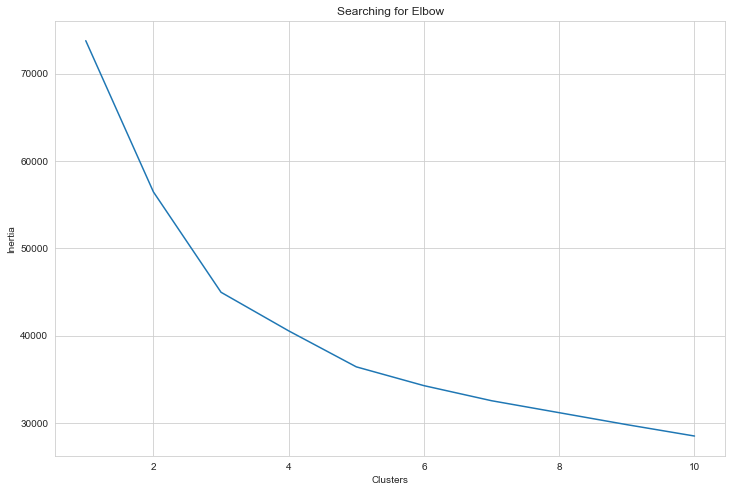

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(scaled)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [ ]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[2 1 2 ... 0 1 0]


In [ ]:
k_means.cluster_centers_

array([[ 5.38367890e-01,  1.00000000e+00,  7.70687944e-01,
         9.55217171e-04,  1.00000000e+00,  3.99215224e-01,
         2.82645952e-01,  9.99494297e-01,  8.55200315e-02,
         1.69789852e-01,  2.77293926e-02,  1.60511603e-01,
         3.34887902e-02,  5.15627634e-01,  6.30494414e-01,
         1.00000000e+00,  7.58779570e-01,  9.04318360e-01],
       [ 5.31981019e-01,  9.39828080e-01,  7.13812708e-01,
         5.45777050e-03,  5.82207668e-01,  2.97903306e-02,
         1.79424205e-02, -1.70974346e-14,  1.44358030e-01,
         8.24464456e-02,  9.25433211e-02,  1.82272479e-01,
         1.00000000e+00,  7.35860963e-01,  4.61615748e-01,
         1.17887843e-01,  3.03056822e-01,  7.91660107e-01],
       [ 5.41877336e-01,  9.97362058e-01,  7.50968467e-01,
         1.24569502e-03,  1.00000000e+00,  4.52736865e-01,
         2.81893456e-01,  1.00000000e+00,  1.39664395e-01,
         1.86432916e-01,  5.63127427e-02,  1.87953396e-01,
         6.10146308e-02,  5.65518063e-01,  6.27264067e

In [ ]:
scaled.columns

Index(['Region', 'Residence_Type', 'Family_Composition', 'Population_Base',
       'Sex', 'Age', 'Marital_Status', 'Student', 'Country_of_Birth', 'Health',
       'Ethnic_Group', 'Religion', 'Economic_Activity', 'Occupation',
       'Industry', 'Hours_worked_per_week', 'Hours_Number',
       'Approximated_Social_Grade'],
      dtype='object')

In [ ]:
import random

fixed_random_state = random.seed(42)

inertia_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(scaled)
    inertia_1.append(kmeans_1.inertia_)

In [ ]:
sns.set_style('whitegrid')

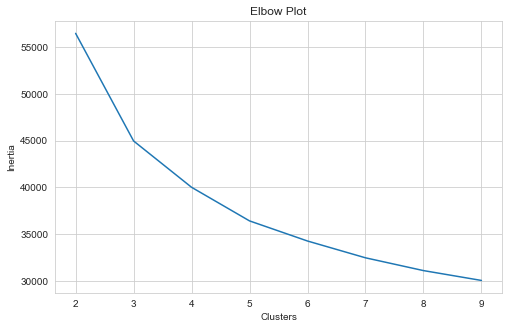

In [ ]:
fig, axs = plt.subplots(figsize=(8,5))
sns.lineplot(x=range_clusters_1, y=inertia_1)
plt.title('Elbow Plot')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[2 1 2 ... 0 1 0]


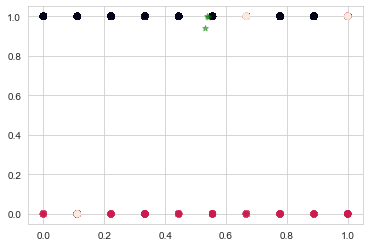

In [ ]:
plt.scatter(scaled.iloc[:,0], scaled.iloc[:,1], c=labels)
centers = k_means.cluster_centers_
labels = k_means.labels_
plt.scatter(centers[:,0], centers[:,1], c='green', marker='*',alpha=0.5)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


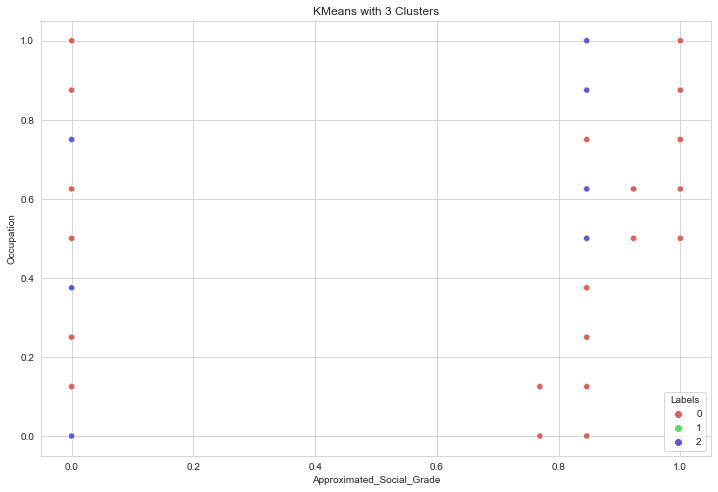

In [ ]:
# Let's see with 3 Clusters
km5 = KMeans(n_clusters=3).fit(scaled)

scaled['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(scaled['Approximated_Social_Grade'], scaled['Occupation'],hue=scaled['Labels'],
                palette=sns.color_palette('hls',3))
plt.title('KMeans with 3 Clusters')

plt.show()

In [ ]:
frame = pd.DataFrame(scaled)
frame['cluster'] = labels
frame['cluster'].value_counts()

0    23358
2    19311
1     7331
Name: cluster, dtype: int64

In [ ]:
k_means.cluster_centers_

array([[ 5.38040738e-01,  1.00000000e+00,  7.65119731e-01,
         1.24154465e-03,  7.61837486e-01,  4.05378600e-01,
         2.68195051e-01,  9.99700317e-01,  9.88526415e-02,
         1.76973628e-01,  3.62616662e-02,  1.68250706e-01,
         5.05037532e-02,  5.29026458e-01,  5.94481937e-01,
         1.00000000e+00,  7.58780127e-01,  9.08352928e-01],
       [ 5.32032920e-01,  9.39844496e-01,  7.13872596e-01,
         5.45628154e-03,  5.82321648e-01,  2.99186105e-02,
         1.81421361e-02, -1.73194792e-14,  1.44318647e-01,
         8.24239531e-02,  9.25180739e-02,  1.82239804e-01,
         1.00000000e+00,  7.35830719e-01,  4.61737826e-01,
         1.18128495e-01,  3.03214032e-01,  7.91674974e-01],
       [ 5.41907606e-01,  9.95443012e-01,  7.46817876e-01,
         1.55351872e-03,  7.06695666e-01,  4.55198246e-01,
         2.63243747e-01,  1.00000000e+00,  1.50018124e-01,
         1.91924292e-01,  6.85490135e-02,  1.95613899e-01,
         7.60015880e-02,  5.48087877e-01,  5.91005597e

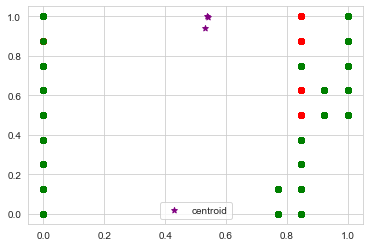

In [ ]:
dfd = scaled[scaled.cluster==0]
dfe = scaled[scaled.cluster==1]
dfg = scaled[scaled.cluster==2]

plt.scatter(dfd.Approximated_Social_Grade,dfd.Occupation,color='yellow')
plt.scatter(dfe.Approximated_Social_Grade,dfe.Occupation,color='red')
plt.scatter(dfg.Approximated_Social_Grade,dfg.Occupation,color='green')

plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
dfp["Cluster"] = labels
dfp.head()

C:\Users\UP2131~1\AppData\Local\Temp/ipykernel_3032/3240635937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["Cluster"] = labels


,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade,Cluster
302321,7394645,0,1,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2,4,2
302322,7394688,0,1,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1,2,1
302323,7394756,0,1,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10,4,2
302324,7394737,0,1,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3,4,2
302325,7394536,0,1,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8,4,2


In [ ]:
dfp.groupby('Cluster').mean()

,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
Cluster,,,,,,,,,,,,,,,,,,,
0,7.524028e+06,4.842367,1.000000,2.476796,1.002483,1.761837,4.432272,2.072780,1.9997,1.098853,1.707895,1.145047,2.346006,1.151511,5.232212,7.539301,2.000000,23.004624,2.808588
1,7.653701e+06,4.788296,0.939844,1.708089,1.010913,1.582322,2.179512,1.072569,1.0000,1.144319,1.329696,1.370072,2.457918,4.000000,6.886646,6.079116,1.118128,9.793207,1.291775
2,7.670404e+06,4.877168,0.995443,2.202268,1.003107,1.706696,4.731189,2.052975,2.0000,1.150018,1.767697,1.274196,2.564911,1.228005,5.384703,7.501062,1.000000,7.986536,2.764538


In [ ]:
dfp.groupby('Cluster').count()

,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade
Cluster,,,,,,,,,,,,,,,,,,,
0,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358
1,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331
2,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311


In [ ]:
# Import PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10, random_state=fixed_random_state).fit(scaled)

princ_comps = np.arange(pca.n_components_, dtype=int) + 1

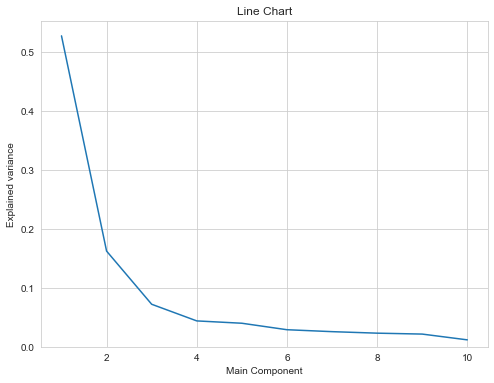

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=princ_comps, y=pca.explained_variance_ratio_)
plt.title('Line Chart')
plt.xlabel('Main Component')
plt.ylabel('Explained variance')
plt.ylim(bottom=0)
plt.show()

In [ ]:
new_s_2 = PCA(n_components=3, random_state=fixed_random_state).fit_transform(scaled)

new_s_2 = pd.DataFrame(new_s_2, columns=["pc1", "pc2", "pc3"])

new_s_2.head()

,pc1,pc2,pc3
0,-1.176317,-0.578845,-0.283752
1,-1.254566,1.426205,-0.481618
2,-1.101010,-0.629671,-0.289777
3,-1.147984,-0.664489,-0.322608
4,-1.100178,-0.704490,-0.315344


In [ ]:
inertia_2 = []
range_clusters_2 = np.arange(2, 10, dtype=int)

for n in range_clusters_2:
    kmeans_2 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(new_s_2)
    inertia_2.append(kmeans_2.inertia_)

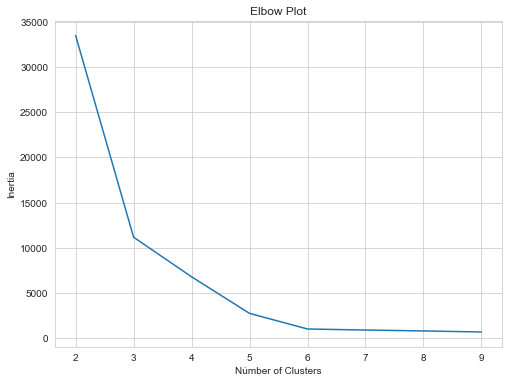

In [ ]:
fig, axs = plt.subplots(figsize=(8,6))
sns.lineplot(x=range_clusters_2, y=inertia_2)
plt.title('Elbow Plot')
plt.xlabel('Númber of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
pca = PCA(n_components = 0.95)
pca.fit(scaled)
data_PCA = pca.transform(scaled)
k_means.fit(data_PCA)

KMeans(n_clusters=3, n_init=12)

In [ ]:
label_pca = k_means.fit_predict(data_PCA)
print(label_pca)

[1 2 1 ... 0 2 0]


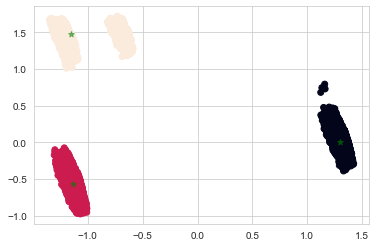

In [ ]:
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_pca)
centers_PCA = k_means.cluster_centers_
plt.scatter(centers_PCA[:,0], centers_PCA[:,1], c='green', marker='*',alpha=0.5)
plt.show()

In [ ]:
dfp["Cluster1"] = label_pca
dfp.head(5)

C:\Users\UP2131~1\AppData\Local\Temp/ipykernel_3032/4008649152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["Cluster1"] = label_pca


,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,...,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade,Cluster,Cluster1
302321,7394645,0,1,5,1,2,5,4,2,1,...,1,2,2,7,7,1,2,4,2,1
302322,7394688,0,1,2,1,2,2,1,1,1,...,1,9,4,7,4,1,1,2,1,2
302323,7394756,0,1,2,1,2,5,2,2,1,...,1,1,1,9,9,1,10,4,2,1
302324,7394737,0,1,2,1,2,6,2,2,1,...,1,2,1,9,11,1,3,4,2,1
302325,7394536,0,1,5,1,2,6,3,2,1,...,1,1,1,9,10,1,8,4,2,1


In [ ]:
dfp.groupby('Cluster1').mean()

,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade,Cluster
Cluster1,,,,,,,,,,,,,,,,,,,,
0,7.524028e+06,4.842367,1.000000,2.476796,1.002483,1.761837,4.432272,2.072780,1.9997,1.098853,1.707895,1.145047,2.346006,1.151511,5.232212,7.539301,2.000000,23.004624,2.808588,0.0
1,7.670404e+06,4.877168,0.995443,2.202268,1.003107,1.706696,4.731189,2.052975,2.0000,1.150018,1.767697,1.274196,2.564911,1.228005,5.384703,7.501062,1.000000,7.986536,2.764538,2.0
2,7.653701e+06,4.788296,0.939844,1.708089,1.010913,1.582322,2.179512,1.072569,1.0000,1.144319,1.329696,1.370072,2.457918,4.000000,6.886646,6.079116,1.118128,9.793207,1.291775,1.0


In [ ]:
dfp.groupby('Cluster1').count()

,Person_ID,Region,Residence_Type,Family_Composition,Population_Base,Sex,Age,Marital_Status,Student,Country_of_Birth,Health,Ethnic_Group,Religion,Economic_Activity,Occupation,Industry,Hours_worked_per_week,Hours_Number,Approximated_Social_Grade,Cluster
Cluster1,,,,,,,,,,,,,,,,,,,,
0,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358,23358
1,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311,19311
2,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331,7331


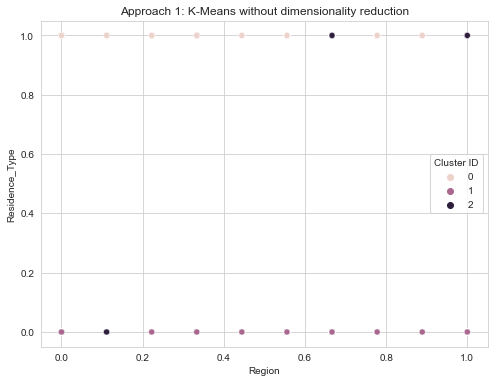

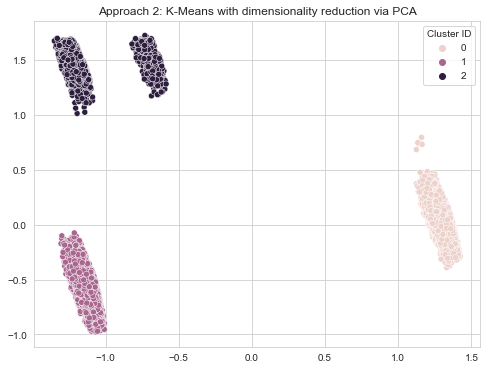

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled.iloc[:, 0], y=scaled.iloc[:, 1], hue=labels)
plt.title("Approach 1: K-Means without dimensionality reduction")
plt.legend(title="Cluster ID")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=data_PCA[:, 0], y=data_PCA[:, 1], hue=label_pca)
plt.title("Approach 2: K-Means with dimensionality reduction via PCA")
plt.legend(title="Cluster ID")
plt.show()

In [ ]:
counts_1 = pd.Series(labels).value_counts().sort_index()
counts_2 = pd.Series(label_pca).value_counts().sort_index()

cluster_counts = pd.DataFrame({"Approch_1": counts_1, "Approach_2": counts_2})

cluster_counts.index.name = "Cluster_id"

cluster_counts

,Approch_1,Approach_2
Cluster_id,,
0,23358,23358
1,7331,19311
2,19311,7331
